In [7]:
import gym
import numpy as np
import time
import matplotlib.pyplot as plt

In [27]:
epsilon = 0.9
min_epsilon = 0.01
decay_rate = 0.9
episodes = 20000
max_steps = 1000000
learning_rate = 0.81
gamma = 0.96
env = gym.make('FrozenLake-v0')
Q = np.zeros((env.observation_space.n, env.action_space.n))
rewards = []

def choose_action(observation):
    action = 0
    if np.random.rand() < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[observation, :])
    return action

def learn(observation, observation2, reward, action):
    prediction = Q[observation, action]
    target = reward + gamma * np.max(Q[observation2, :])
    Q[observation, action] = Q[observation, action] + learning_rate * (target - prediction)
    
for episode in range(episodes):
    obs = env.reset()
    temp = 0
    done = False

    for i in range(max_steps):
        if done:
            break
        action = choose_action(obs)
        obs2, reward, done, info = env.step(action)
        temp += reward
        learn(obs, obs2, reward, action)
        obs = obs2
    if episode % 100 == 99:
        epsilon *= decay_rate
        epsilon = max(epsilon, min_epsilon)
    rewards.append(temp)

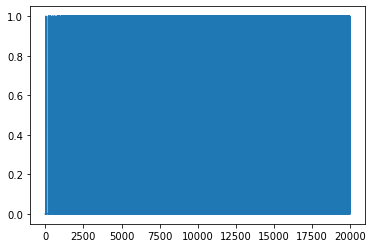

In [28]:
plt.plot(rewards)

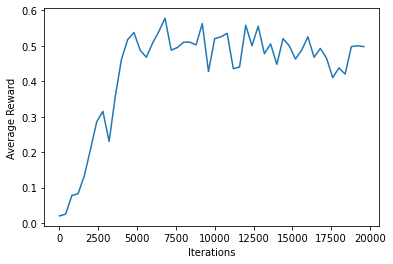

In [29]:
def chunk_list(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

size = int(episodes / 50)
chunks = list(chunk_list(rewards, size))
averages = [sum(chunk) / len(chunk) for chunk in chunks]

plt.plot(range(0, len(rewards), size), averages)
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.show()
    

In [20]:
if episode % 100 == 99:
    epsilon *= decay_rate
    epsilon = max(epsilon, min_epsilon)

'  if episode % 100 == 99:\n        epsilon *= decay_rate\n        epsilon = max(epsilon, min_epsilon) '

In [ ]:
def choose_action(observation):
    action = 0
    if np.random.rand() < epsilon:
        action = env.action_space.sample()

    else:
        action = np.argmax(Q[observation, :])
    return action

def choose_action(observation):
    action = 0
    if np.random.rand() < epsilon:
        action = np.argmax(Q[observation, :])
    else:
        action = env.action_space.sample()
    return action